# Coffee dataset clustering using kShape 

<img align="right" src="https://bit.ly/2NlJd8X" alt="drawing" style="width:125px;"/>
                                                                                    

Time series clustering consists of grouping time series based on their characteristics. A really important feature about these methods is the ability to deal with a large variety of datasets from different sources.

In this example, we will use the [Khiva's](https://khiva-python.readthedocs.io/en/latest/) implementation of [_kShape_](http://www.cs.columbia.edu/~gravano/Papers/2017/tods17.pdf) to extract valuable information reaching outstanding results. _kShape_, unlike some other clustering algorithms (i.e. _kMeans_), obtains better results, due to the lack of dependence on scale, shifting and domain. In the following use-case we confront the results and find the differences obtained using both algorithms.

We have chosen a [Coffee Dataset](http://www.timeseriesclassification.com/dataset.php) containing 28 time-series. Each time-series depicts the spectrograph of one coffee bean belonging to either the Arabica or the Robusta variety. Main differences between both varieties are shown below:



| Variety |          Taste         |              Look             |          Price               |   Chemistry  |
|--------:|-----------------------:|------------------------------:|-----------------------------:|:------------:|
| Robusta | Woody or burnt quality | Paler, more circular, smaller |      Generally cheaper       | 25% more caffeine and flavour compounds|
| Arabica | Sweet, higher acidity  |    Oval, generally larger     | About 3 times more expensive | Lower caffeine content  |


Thus, the classification will be performed in a binary fashion, deciding, for every spectrograph, the ones belonging to Robusta or Arabica coffee beans.



<div style="text-align: right"> <font size="1"> Illustration by Shannon Wheeler (@muchcoffee) </font> </div>

In [1]:
#from khiva.library import 
import khiva as kv
from khiva.clustering import *
from khiva.array import Array
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from ipywidgets import interact, IntSlider

import numpy as np
import pandas as pd

In [4]:
def statistics(output, test_classes):
    equals = float(np.sum(output == test_classes))
    gttp = float(np.sum(test_classes == 1))  # could also use np.sum(test_classes) since elements are 0 and 1
    gttn = float(np.sum(test_classes == 0))  # Also: len(test_classes) - gttp because of binary classification

    # indexes of the 1s in output
    ind1_output = np.flatnonzero(output)

    # indexes of the 1s in test_classes
    ind1_test_classes = np.flatnonzero(test_classes)

    # indexes of the 0s in output
    ind0_output = np.where(output == 0)[0]  # returns a tuple. We extract the first and only element

    # indexes of the 0s in test_classes
    ind0_test_classes = np.where(test_classes == 0)[0]

    # Now we have the indexes of the elements in the results obtained and the ground_truth's
    true_positives = float(len(np.intersect1d(ind1_output, ind1_test_classes)))

    # false_positives = len(np.intersect1d(ind1_output, ind0_test_classes))

    true_negatives = float(len(np.intersect1d(ind0_output, ind0_test_classes)))

    # false_negatives = len(np.intersect1d(ind0_output, ind1_test_classes))
    
    accuracy = max(equals/len(output), 1-(equals/len(output)))

    print("Accuracy: " + str(accuracy))
    print("True positive: " + str(true_positives / gttp))
    print("True negative: " + str(true_negatives / gttn))
    print("False positive: " + str(1 - true_negatives / gttn))
    print("False negative: " + str(1 - true_positives / gttp))

## Visualising the dataset
First, we load the dataset in the workspace and print it in a single graph. At first sight, it is hardly impossible to perform any kind of classification and that is the reason why clustering tools are important to extract relevant information from this kind of time-series.

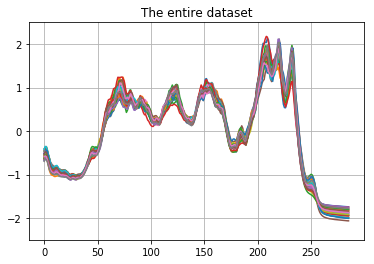

In [3]:
data = pd.read_csv("Coffee_TRAIN.txt", header=None, sep=' ')
data = data.values #from panda frama to numpy array

classes = data[:,0] # extracting the classes

data = np.delete(data, 0, 1) # data now contains only the time-series

f1, ax1 = plt.subplots()
ax1.set_ylim([-2.5, 2.5])
ax1.plot(data.T)
plt.title("The entire dataset")
plt.grid(True)

## Clustering using _kShape_
After realising that no information can be extracted from the visualisation of the dataset, we perform the clustering using Khiva's _kShape_ implementation. After computing the centroids, we are going to print each one of those and comprehend the differences between them.

You can vary the number of iterations computed with the slider button! This way, you can assess the impact on accuracy by reducing the amount of computation first-hand. You can also observe the statistics corresponding to this classification with a summary of the results.


In [ ]:
arr = Array(data) # passing the dataset to KHIVA_ARRAY

def k_shape_interaction(num_iter):
    (centroids, indexes) = k_shape(arr, 2, tolerance=10e-10, max_iterations=num_iter)
    ind = indexes.to_numpy()
    cen = centroids.to_numpy()

    f2, ax2 = plt.subplots()
    ax2.set_ylim([-2.5, 2.5])
    ax2.plot(cen.T)
    plt.title("Centroids with kShape")
    plt.grid(True)

    print("kShape Statistics:")
    statistics((ind)%2, classes)

interact(k_shape_interaction, num_iter=IntSlider(min=1, max=20, step=1), continuous_update=False)

interactive(children=(IntSlider(value=1, description='num_iter', max=20, min=1), Output()), _dom_classes=('wid…


## Clustering using kMeans

Now, we try the same analysis using the Scikit's kMeans implementation in order to compare the different results obtained. 
Below, you will find the statistics corresponding to this classification algorithm. We can clearly see that the _kShape_ clustering method delivers better results. In fact, _kShape_ reaches perfect accuracy when used upon the Coffee dataset. On the other hand, kMeans obtains an accuracy of 92.86%, which means that, out of the 28 time-series we were to classify, 2 have been improperly assigned to a cluster.



kMeans Statistics

Accuracy: 0.9285714285714286
True positive: 1.0
True negative: 0.8571428571428571
False positive: 0.1428571428571429
False negative: 0.0


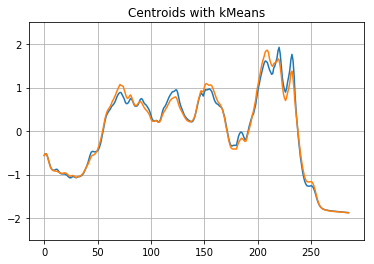

In [88]:
km = KMeans(n_clusters=2).fit(data)
f3, ax3 = plt.subplots()
ax3.set_ylim([-2.5, 2.5])
ax3.plot(km.cluster_centers_.T)
plt.title("Centroids with kMeans")
plt.grid(True)

print("\n\nkMeans Statistics\n")
statistics((km.labels_+1)%2, classes)

## Visualising the clusters with _kShape_
Now that we have computed the clusters using _kShape_, we are ready to print the time-series belonging to the first cluster, along with the first centroid. Paying attention to the graph, it is pretty simple to conclude that the centroid summarises the shape of all the time-series belonging to this first cluster. Besides, we show the analogue graph for the second cluster.

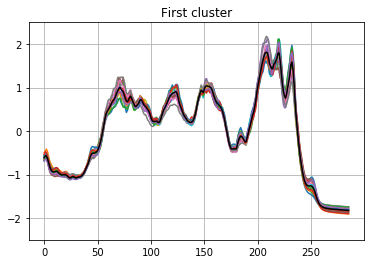

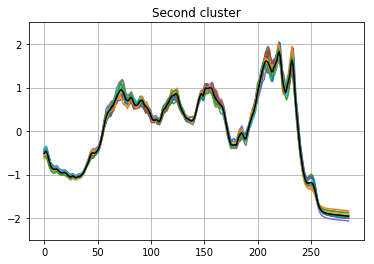

In [89]:
first_cluster = data[ind == 0]
f4, ax4 = plt.subplots()
ax4.set_ylim([-2.5, 2.5])

plt.plot(first_cluster.T)
plt.plot(cen[0, :], 'k')
plt.title("First cluster")
plt.grid(True)


second_cluster = data[ind == 1]
f5, ax5 = plt.subplots()
ax5.set_ylim([-2.5, 2.5])

plt.plot(second_cluster.T)
plt.plot(cen[1, :], 'k')
plt.title("Second cluster")
plt.grid(True)


## Loading the Testing Dataset
With the purpose to show how accurate the centroids summarise the clusters, we classify a new set of time-series, which conform the testing dataset. The testing dataset will be loaded and, using the centroids priorly computed, classified into two clusters. Once the dataset is loaded, every time-series will be assigned to a cluster based on the Euclidean distance algorithm method and, right after that, we use the [_NCC_](http://www.cs.columbia.edu/~gravano/Papers/2017/tods17.pdf) distance method.


In [5]:
def _ncc_c_3dim(x, y):
    den = np.linalg.norm(x, axis=1)[:, None] * np.linalg.norm(y, axis=1)
    den[den == 0] = np.Inf
    x_len = x.shape[-1]
    fft_size = 1 << (2*x_len-1).bit_length()
    cc = np.fft.ifft(np.fft.fft(x, fft_size) * np.conj(np.fft.fft(y, fft_size))[:, None])
    cc = np.concatenate((cc[:,:,-(x_len-1):], cc[:,:,:x_len]), axis=2)
    return np.real(cc) / den.T[:, :, None]

test = pd.read_csv("Coffee_TEST.txt", header = None, sep=' ')
test = test.values

test_classes = test[:,0]
test = np.delete(test, 0, 1)


distances = np.empty((cen.shape[0], test.shape[0]))

for i in range(test.shape[0]):
    for j in range(cen.shape[0]):
        distances[j, i] = np.sum(np.abs(test[i,:] - cen[j, :]))

idx_test = np.argmin(distances, 0)
print("\n\nTest Dataset with kShape centroids and Euclidean distance Statistics\n")
statistics(idx_test, test_classes)

distances_NCC = (1 - _ncc_c_3dim(test, cen).max(axis=2)).T
idx_test_ncc = distances_NCC.argmin(1)
print("\n\nTest Dataset with kShape centroids and NCC distance Statistics\n")
statistics(idx_test_ncc, test_classes)

NameError: name 'pd' is not defined

Finally, we print the time-series that have not been properly assigned to their corresponding cluster.

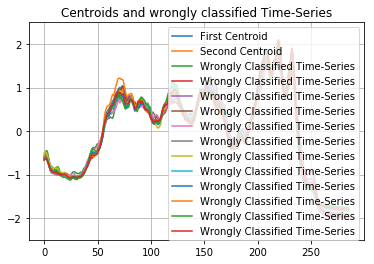

In [73]:
#Plotting the time-series that have not been properly classified..
failed_tss = test[(idx_test_ncc != test_classes)]

f6, ax6 = plt.subplots()
ax6.set_ylim([-2.5, 2.5])
plt.plot(cen[0, :], label="First Centroid")
plt.plot(cen[1, :], label="Second Centroid")
for i in range(failed_tss.shape[0]):
    plt.plot(failed_tss[i,:], label="Wrongly Classified Time-Series")
plt.title("Centroids and wrongly classified Time-Series")
plt.grid(True)
plt.legend()
plt.show()
f6.savefig("Wrongly_classified.png")

Considering the previous results, we are in position to affirm that Khiva's _kShape_ GPU-implementation delivers better results than Scikit's CPU-_kMeans_.

We encourage you to try Khiva's _kShape_ implementation on your dataset. Share with us your results and make a pull request so we can publish them!